In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as wb
import matplotlib.pyplot as plt

In [3]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6095 entries, 1995-01-03 to 2019-03-19
Data columns (total 4 columns):
PG      6095 non-null float64
MSFT    6095 non-null float64
F       6095 non-null float64
GE      6095 non-null float64
dtypes: float64(4)
memory usage: 238.1 KB


In [5]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.528542,2.718300,3.471492,2.740008
1995-01-04,6.476213,2.738060,3.564892,2.740008
1995-01-05,6.384629,2.692897,3.533757,2.746723
1995-01-06,6.397709,2.738060,3.533757,2.733292
1995-01-09,6.371546,2.721123,3.596028,2.706429


In [6]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2019-03-13,101.180000,114.500000,8.53,10.02
2019-03-14,101.320000,114.589996,8.41,10.30
2019-03-15,102.440002,115.910004,8.43,9.96
2019-03-18,101.510002,117.570000,8.57,10.20
2019-03-19,101.900002,117.650002,8.70,10.19


In [7]:
mydata.iloc[0]

PG      6.528542
MSFT    2.718300
F       3.471492
GE      2.740008
Name: 1995-01-03 00:00:00, dtype: float64

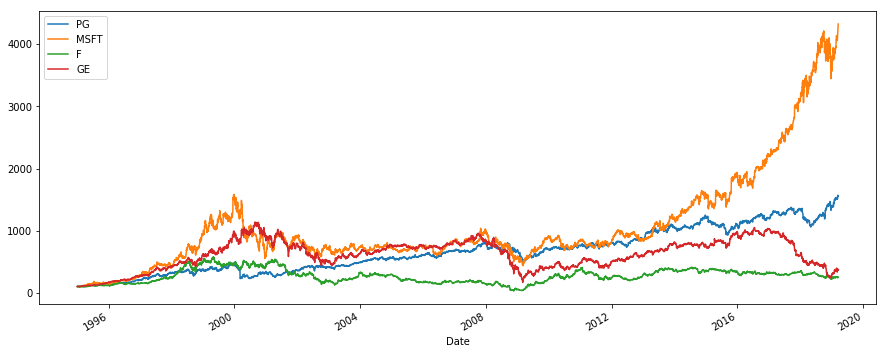

In [8]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15, 6))

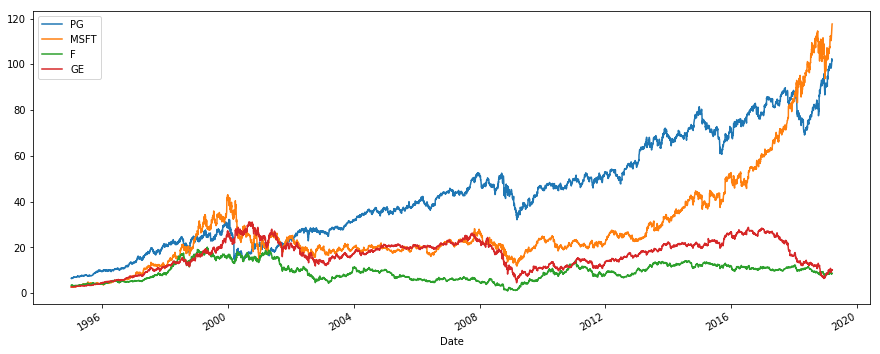

In [9]:
mydata.plot(figsize=(15, 6))

In [10]:
mydata.loc['1995-01-03']

PG      6.528542
MSFT    2.718300
F       3.471492
GE      2.740008
Name: 1995-01-03 00:00:00, dtype: float64

In [11]:
mydata.iloc[0]

PG      6.528542
MSFT    2.718300
F       3.471492
GE      2.740008
Name: 1995-01-03 00:00:00, dtype: float64

In [13]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017622,-0.009828


In [14]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [15]:
np.dot(returns, weights)

array([        nan,  0.00653969, -0.0092299 , ..., -0.00201451,
        0.01148664,  0.00467781])

In [18]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.137700
MSFT    0.203866
F       0.115762
GE      0.098868
dtype: float64

In [19]:
np.dot(annual_returns, weights)

0.13904875036015563

In [20]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
print(pfolio_1)

13.905000000000001%


In [ ]:
weights_